Loading training data...
Scanning path: /Users/macbook/Desktop/M2/Prof M. Benaddy Deep Learning/Tp 4/Tifinagh/Dataset/train_data
Detected categories: ['yak', 'yal', 'yae', 'yab', 'yaw', 'yakk', 'yay', 'yagg', 'yad', 'yam', 'yaj', 'yax', 'yagh', 'yaq', 'yach', 'yey', 'yarr', 'ya', 'yazz', 'yi', 'yass', 'yu', 'yat', 'yas', 'yaz', 'yah', 'yaf', 'yahh', 'yar', 'yadd', 'yag', 'yan', 'yatt']
Found 854 images in yak
Found 854 images in yalm yak class.
Found 854 images in yaem yal class.
Found 854 images in yabm yae class.
Found 854 images in yawm yab class.
Found 854 images in yakk yaw class.
Found 854 images in yaym yakk class.
Found 854 images in yagg yay class.
Found 854 images in yadm yagg class.
Found 854 images in yamm yad class.
Found 854 images in yajm yam class.
Found 854 images in yaxm yaj class.
Found 854 images in yagh yax class.
Found 854 images in yaqm yagh class.
Found 854 images in yach yaq class.
Found 854 images in yeym yach class.
Found 854 images in yarr yey class.
Found 8

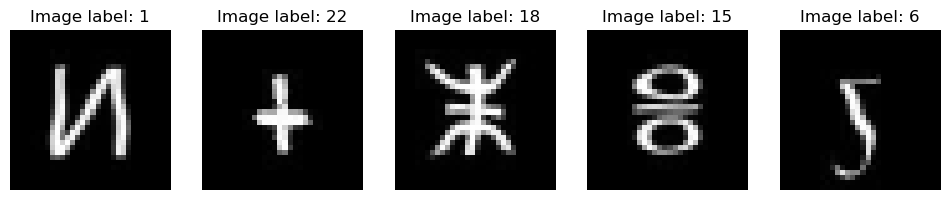

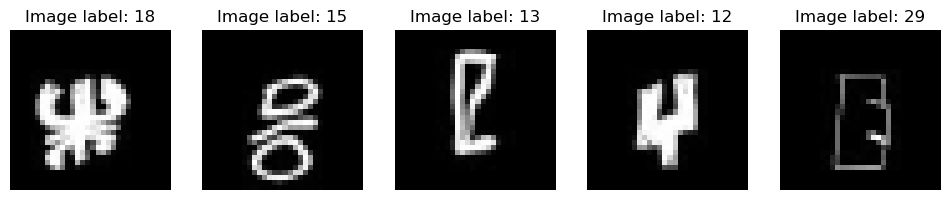

x_train shape: (6600, 1024)
6600 train samples
1650 test samples


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 33)             │         4,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 594,721 (2.27 MB)

 Trainable params: 594,721 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


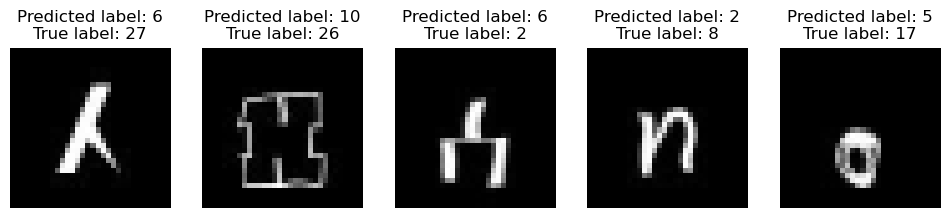

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.1976 - loss: 2.9568 - val_accuracy: 0.5679 - val_loss: 1.7357
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5030 - loss: 1.7657 - val_accuracy: 0.6370 - val_loss: 1.3571
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6062 - loss: 1.3589 - val_accuracy: 0.7497 - val_loss: 0.9648
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6938 - loss: 1.0349 - val_accuracy: 0.7952 - val_loss: 0.7751
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7522 - loss: 0.8390 - val_accuracy: 0.8600 - val_loss: 0.5869
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7940 - loss: 0.6909 - val_accuracy: 0.8952 - val_loss: 0.4636
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8217 - loss: 0.5926 - val_accuracy: 0.8788 - val_loss: 0.4280
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8586 - loss: 0.4911 - val_accuracy: 0.9097 - v

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

"""## Data loading and adaptation"""

def upload_data(path_name, number_of_images_per_class):
    X_Data = []
    Y_Data = []
    if not os.path.exists(path_name):
        print(f"Error: Path does not exist: {path_name}")
        return np.array([]), np.array([])
    print(f"Scanning path: {path_name}")
    # Dynamically get all subdirectories as categories
    categories = [d for d in os.listdir(path_name) if os.path.isdir(os.path.join(path_name, d))]
    if not categories:
        print(f"No subdirectories found in {path_name}")
        return np.array([]), np.array([])
    print(f"Detected categories: {categories}")
    for idx, category in enumerate(categories):
        category_path = os.path.join(path_name, category)
        if os.path.isdir(category_path):
            images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            print(f"Found {len(images)} images in {category}")
            if images:
                images_to_use = images[:min(number_of_images_per_class, len(images))]  # Limit to available images
                for img_file in images_to_use:
                    img_path = os.path.join(category_path, img_file)
                    img = cv2.imread(img_path, 0)  # Load as grayscale
                    if img is not None:
                        # Resize image to 32x32 immediately
                        img_resized = cv2.resize(img, (32, 32))
                        X_Data.append(img_resized)
                        Y_Data.append(idx)
                    else:
                        print(f"Failed to load image: {img_path}")
                print(f"> Loaded {len(images_to_use)} images from {category} class.", end='\r')
            else:
                print(f"No images found in {category}")
        else:
            print(f"Directory not found for category: {category}")
    return np.array(X_Data) if X_Data else np.array([]), np.array(Y_Data) if Y_Data else np.array([])

# Define sampling limits
n_train = 200  # Reduced to a safe number (adjust based on dataset size, e.g., ~854 per class)
n_test = 50    # Reduced to a safe number (e.g., ~214 per class)

# Update paths to local dataset
train_path = '/Users/macbook/Desktop/M2/Prof M. Benaddy Deep Learning/Tp 4/Tifinagh/Dataset/train_data'
test_path = '/Users/macbook/Desktop/M2/Prof M. Benaddy Deep Learning/Tp 4/Tifinagh/Dataset/test_data'

# Load training and testing data
print("Loading training data...")
x_train, y_train = upload_data(train_path, n_train)
print("\nLoading testing data...")
x_test, y_test = upload_data(test_path, n_test)

print("\nThe x_train's shape is:", x_train.shape)
print("The x_test's shape is:", x_test.shape)
print("The y_train's shape is:", y_train.shape)
print("The y_test's shape is:", y_test.shape)

def plot_data(num=3):
    if len(x_test) == 0:
        print("Error: x_test is empty, cannot plot data.")
        return
    fig, axes = plt.subplots(1, num, figsize=(12, 8))
    for i in range(num):
        index = np.random.randint(len(x_test))
        axes[i].imshow(x_test[index], cmap='gray')  # Use directly, already 32x32
        axes[i].set_title('Image label: %d' % y_test[index])
        axes[i].axis('off')
    plt.show()

if x_test.size > 0:
    plot_data(num=5)
    plot_data(num=5)

num_classes = len([d for d in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, d))]) if os.path.exists(test_path) else 0  # Dynamic num_classes
size = 32  # Adjusted to 32x32 as per TP requirements

# Preprocess data
if x_train.size > 0 and x_test.size > 0:
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train = np.reshape(x_train, (x_train.shape[0], size * size))  # Already 32x32, flatten directly
    x_test = np.reshape(x_test, (x_test.shape[0], size * size))    # Already 32x32, flatten directly
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # Convert class vectors to binary class matrices
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    """## Define our neural network model (Architecture)"""

    model = Sequential()
    model.add(Dense(512, input_shape=(size * size,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  metrics=['accuracy'])

    model.summary()

    """## Model prediction on test data before training"""

    def plot_predictions(model, num=3):
        if len(x_test) == 0:
            print("Error: x_test is empty, cannot plot predictions.")
            return
        fig, axes = plt.subplots(1, num, figsize=(12, 8))
        for i in range(num):
            index = np.random.randint(len(x_test))
            pred = np.argmax(model.predict(np.reshape(x_test[index], (1, size * size))))
            axes[i].imshow(np.reshape(x_test[index], (size, size)), cmap='gray')
            axes[i].set_title('Predicted label: ' + str(pred) + '\nTrue label: ' + str(np.argmax(y_test[index])))
            axes[i].axis('off')
        plt.show()

    plot_predictions(model, num=5)

    """## Training"""

    history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

    """## Model prediction on test data after training"""

    plot_predictions(model, num=5)
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    """## Model history during training"""

    # Removed xkcd style to avoid font warnings
    plt.plot(history.history['accuracy'], color='c')
    plt.plot(history.history['val_accuracy'], color='red')
    plt.title('Tifinagh model accuracy')
    plt.legend(['acc', 'val_acc'])
    plt.savefig('acc_Tifinagh.png')
    plt.show()

    plt.plot(history.history['loss'], color='c')
    plt.plot(history.history['val_loss'], color='red')
    plt.title('Tifinagh model loss')
    plt.legend(['loss', 'val_loss'])
    plt.savefig('loss_Tifinagh.png')
    plt.show()
else:
    print("Error: Insufficient data to proceed with model training.")